In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
from tqdm import tqdm, notebook

In [2]:
# dark mode better
plt.style.use('dark_background')

In [3]:
slope = gpd.read_file('./25_Or_Greater_Slope/slope.shp')
hoods = gpd.read_file('./City_of_Pittsburgh_Neighborhoods/City_of_Pittsburgh_Neighborhoods.shp')

In [4]:
slope.head()

,objectid_1,objectid,created_us,created_da,last_edite,last_edi_1,slope25,shape__are,shape__len,Shape__A_1,Shape__L_1,geometry
0,1,2,pgh.admin,2018-04-04,pgh.admin,2018-04-04,Yes,0.003862,69.937392,2645.413208,392.773240,"POLYGON ((-80.01197 40.44102, -80.01209 40.441..."
1,2,2,pgh.admin,2018-04-04,pgh.admin,2018-04-04,Yes,0.003862,69.937392,59049.023743,6866.637198,"MULTIPOLYGON (((-80.00924 40.44286, -80.00905 ..."
2,3,2,pgh.admin,2018-04-04,pgh.admin,2018-04-04,Yes,0.003862,69.937392,9045.813782,1393.240756,"MULTIPOLYGON (((-80.00781 40.44137, -80.00781 ..."
3,4,2,pgh.admin,2018-04-04,pgh.admin,2018-04-04,Yes,0.003862,69.937392,128389.867828,6379.887277,"MULTIPOLYGON (((-80.01584 40.43966, -80.01584 ..."
4,5,2,pgh.admin,2018-04-04,pgh.admin,2018-04-04,Yes,0.003862,69.937392,37365.504333,3541.131838,"MULTIPOLYGON (((-80.00795 40.44053, -80.00799 ..."


In [100]:
slope.columns

Index(['objectid_1', 'objectid', 'created_us', 'created_da', 'last_edite',
       'last_edi_1', 'slope25', 'shape__are', 'shape__len', 'Shape__A_1',
       'Shape__L_1', 'geometry'],
      dtype='object')

In [97]:
hoods.head()

,OBJECTID,FID_BlockG,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,...,UNIQUE_ID,SECTORS,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Page_Numbe,Shape_Le_3,Shape_Le_4,Shape_Area,geometry
0,1,0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,113,14,11526.863222,7.843108e+06,11525.904546,0,11525.904546,11525.904546,7.842997e+06,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,25,14,20941.386025,1.390463e+07,20945.562570,0,20945.562570,20945.562570,1.390469e+07,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,21,14,18271.426385,5.999801e+06,18280.484515,0,18280.484515,18280.483375,5.998649e+06,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,3,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,19,15,15696.759230,7.202139e+06,15694.771443,0,15694.771443,15694.771444,7.203631e+06,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,5,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,23,13,23903.077852,1.694785e+07,24019.532672,0,24019.532672,24019.532672,1.694875e+07,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


In [101]:
hoods.columns

Index(['OBJECTID', 'FID_BlockG', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10',
       'BLKGRPCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng',
       'FID_Neighb', 'AREA', 'PERIMETER', 'NEIGHBOR_', 'NEIGHBOR_I', 'HOOD',
       'HOOD_NO', 'ACRES', 'SQMILES', 'DPWDIV', 'UNIQUE_ID', 'SECTORS',
       'Shape_Le_1', 'Shape_Ar_1', 'Shape_Le_2', 'Page_Numbe', 'Shape_Le_3',
       'Shape_Le_4', 'Shape_Area', 'geometry'],
      dtype='object')

In [5]:
# EXPLODE THE DATADRAME!
slope_exploded = slope.explode()

In [5]:
data = []
pbar = tqdm(total=len(hoods) * len(slope_exploded))
for i1, hood in hoods.iterrows():
    for i2, s in slope_exploded.iterrows():
        if hood['geometry'].intersects(s['geometry']):
            data.append(
                {
                    'geometry': s['geometry'].buffer(0).intersection(hood['geometry'].buffer(0)),
                    'hood_i': i1
                })
        pbar.update(1)
df = gpd.GeoDataFrame(data, columns=['geometry', 'hood_i'])

100%|██████████| 3554915/3554915 [09:20<00:00, 4105.66it/s] 

In [6]:
df.head()

,geometry,hood_i
0,"POLYGON ((-79.95494 40.44103, -79.95502 40.441...",0
1,"POLYGON ((-79.95445 40.44102, -79.95454 40.441...",0
2,"POLYGON ((-79.95409 40.44058, -79.95424 40.440...",0
3,"POLYGON ((-79.95370 40.44059, -79.95370 40.440...",0
4,"POLYGON ((-79.95364 40.44124, -79.95364 40.441...",0


In [5]:
# pickle the dataframe so i dont have to make it every goddamn time
with open('df.pickle', 'wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

In [6]:
# load pickled df
with open('df.pickle', 'rb') as file:
    df = pickle.load(file)

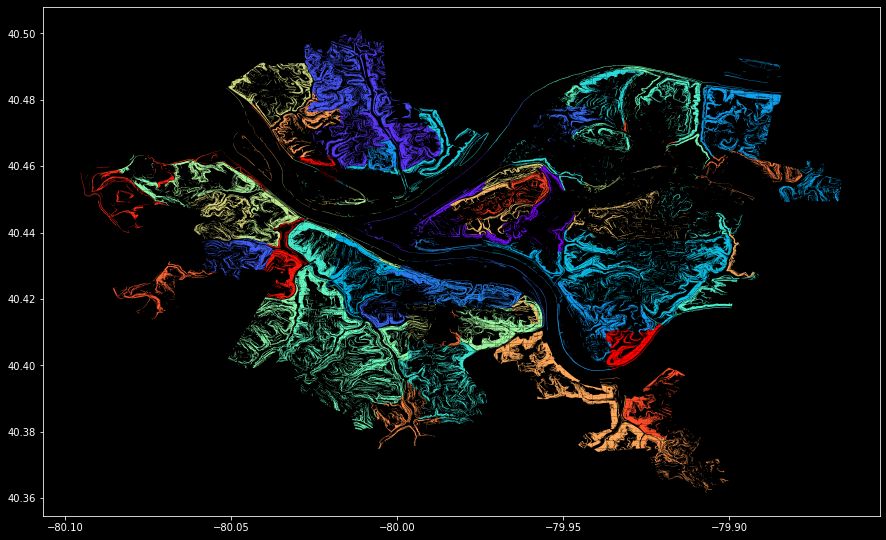

In [13]:
df.plot(
    figsize=(15, 15), 
    column=df['hood_i'],
    cmap='rainbow',
)

In [7]:
area = []
for i in range(91):
    area.append(0)
for i, row in df.iterrows():
    area[row['hood_i']] += row['geometry'].area
d = {
    'name': [],
    'density': [],
}
for i, hood in hoods.iterrows():
    d['name'].append(hood['HOOD'])
    d['density'].append(area[i] / hood['geometry'].area)
density_df = pd.DataFrame(data=d)

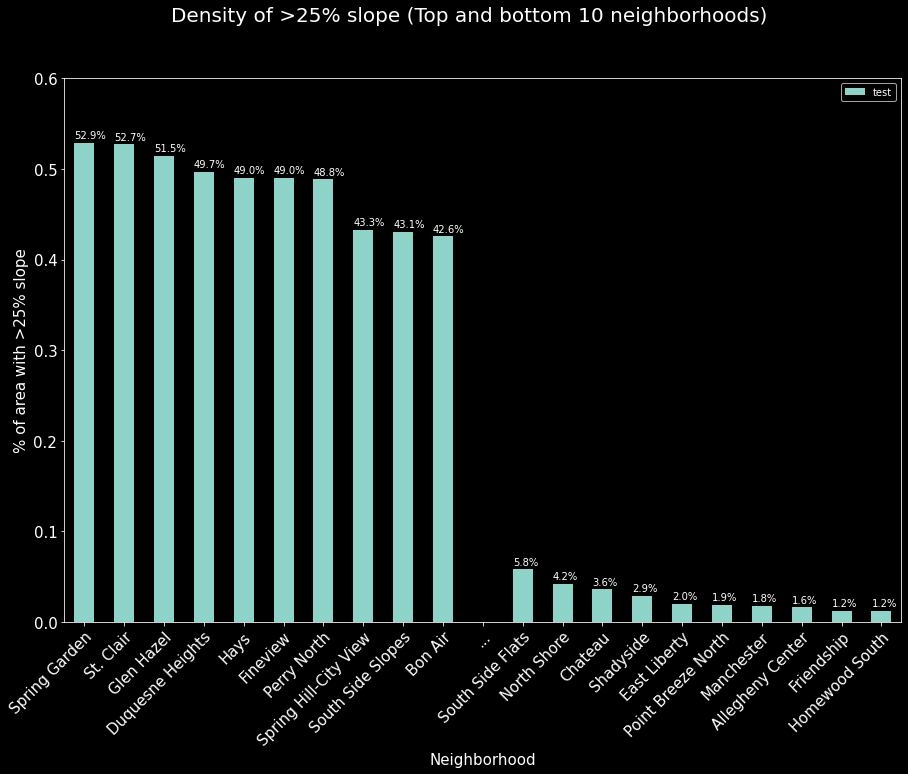

In [8]:
top_bottom_ten = pd.concat(
    (
        density_df.sort_values(by='density', ascending=False)[:10],
        pd.DataFrame({'name': ['...'], 'density': [0]}),
        density_df.sort_values(by='density', ascending=False)[-10:]
    ),
)
fig, ax = plt.subplots()
top_bottom_ten.plot.bar(
    ax=ax,
    x='name', 
    y='density', 
    label='test', 
    figsize=(15,10),
    ylim=(0, .6),
    fontsize=15
)
fig.suptitle('Density of >25% slope (Top and bottom 10 neighborhoods)', fontsize=20)
ax.set_xlabel('Neighborhood', fontsize=15)
ax.set_ylabel('% of area with >25% slope', fontsize=15)
plt.setp(
    ax.xaxis.get_majorticklabels(), 
    rotation=45, 
    ha='right',
    rotation_mode='anchor',
)
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(
            '{:.1%}'.format(p.get_height()), 
            (p.get_x() - 0, p.get_height() + .005),
        )

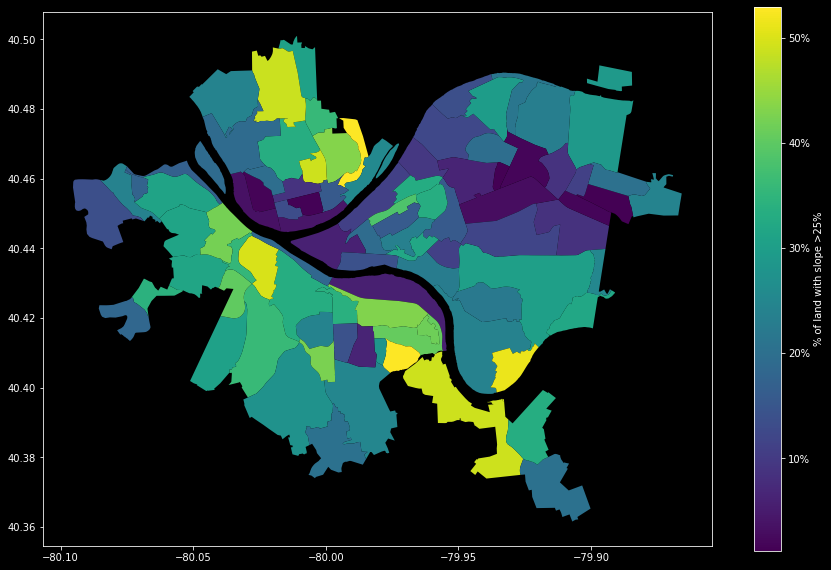

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hoods.plot(
    ax=ax,
    column=density_df['density'],
    legend=True,
    legend_kwds={
        'label': "% of land with slope >25%",
        'orientation': 'vertical', 
        'format': mtick.PercentFormatter(1.0),
    },
    cmap='viridis',
)

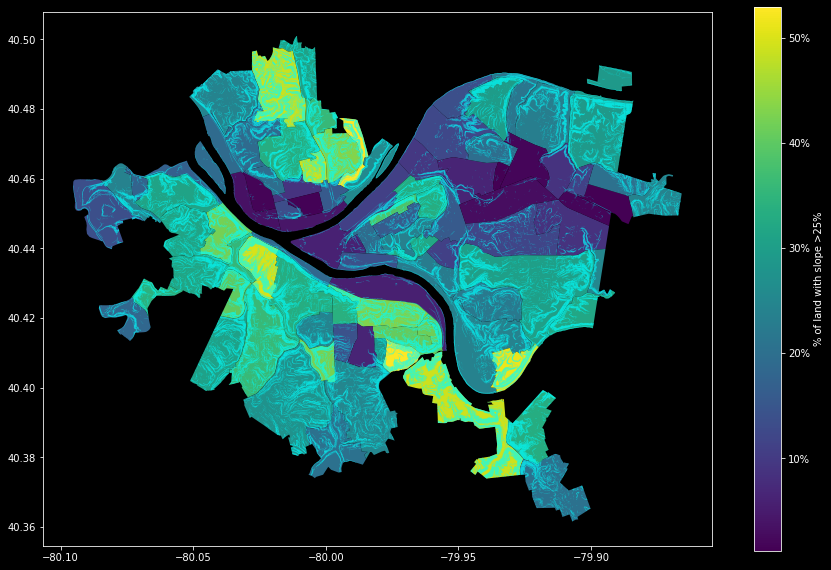

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hoods.plot(
    ax=ax,
    column=density_df['density'],
    legend=True,
    legend_kwds={
        'label': "% of land with slope >25%",
        'orientation': 'vertical', 
        'format': mtick.PercentFormatter(1.0),
    },
    cmap='viridis',
)
slope.plot(
    ax=ax,
    alpha=.7,
    color='cyan',
)

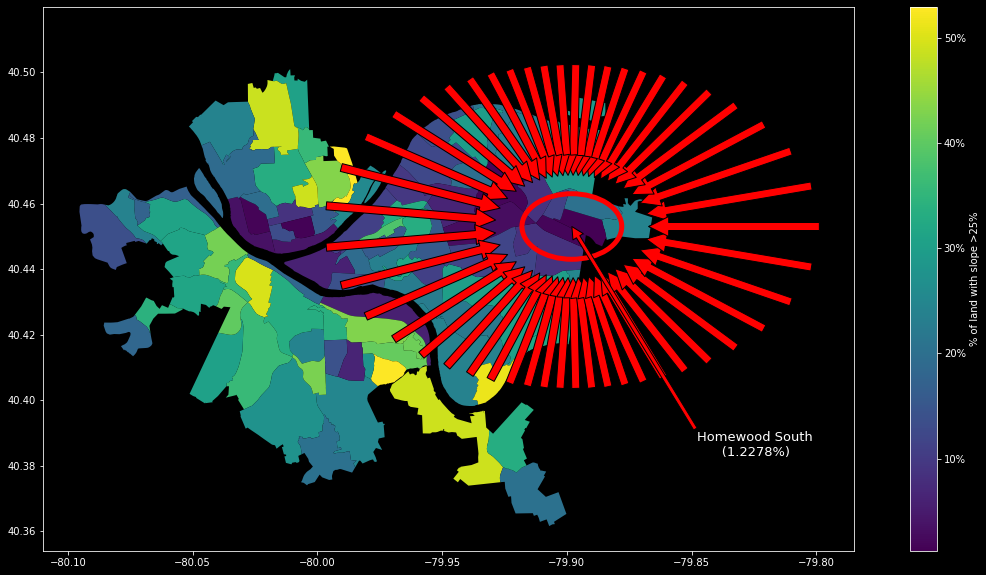

In [24]:
# is this necessary?
# no
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
for i in np.linspace(0, 2*np.pi, 50):
    a = .2
    b = .1
    theta = i * 1
    r = (a * b) / (np.sqrt((b * np.cos(theta))**2 + (a * np.sin(theta))**2))
    dx = r * np.cos(theta)
    dy = r * np.sin(theta)
    arrow = mpatches.FancyArrowPatch(
        (-79.898 + .5*dx, 40.453 + .5*dy), # tail
        (-79.898 + .15*dx, 40.453 + .15*dy), # head
        mutation_scale=40,
        edgecolor='black',
        facecolor='red'
    )
    ax.add_patch(arrow)
ellipse = mpatches.Ellipse(
    xy=(-79.898, 40.453),
    width=.04,
    height=.02,
    fill=False,
    color='red',
    lw=5,
)
ax.add_patch(ellipse)
ax.annotate(
    'Homewood South\n      (1.2278%)', 
    xy=(-79.898, 40.453), 
    xytext=(-79.898 + .05, 40.453 - .07), 
    fontsize=13,
    arrowprops=dict(facecolor='red', edgecolor='black')
)
hoods.plot(
    ax=ax,
    column=density_df['density'],
    legend=True,
    legend_kwds={
        'label': "% of land with slope >25%", 
        'orientation': 'vertical', 
        'format': mtick.PercentFormatter(1.0),
    },
    cmap='viridis',
)

In [8]:
stopLights = pd.read_csv("RedLights.csv") 
speedBumps = pd.read_csv("SpeedBumps.csv")

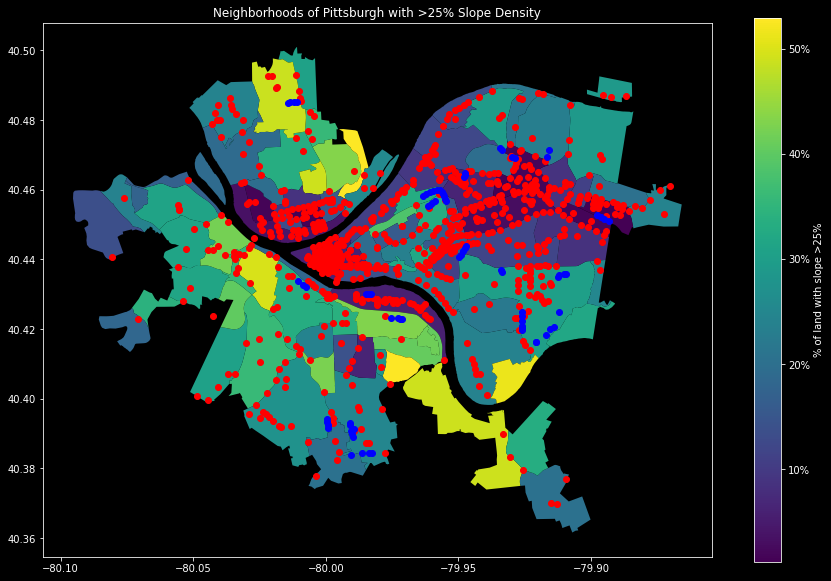

In [18]:
tick_args={
    'left': False,
    'labelleft': False, 
    'labelbottom': False, 
    'bottom': False
}

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hoods.plot(
    ax=ax,
    column=density_df['density'],
    cmap='viridis',
    legend=True,
    legend_kwds={
        'label': "% of land with slope >25%",
        'orientation': 'vertical', 
        'format': mtick.PercentFormatter(1.0),
    },
)
# plt.tick_params(**tick_args)
for row in stopLights.iterrows():
    plt.plot(row[1]['longitude'], row[1]['latitude'], 'ro')
for row in speedBumps.iterrows():
    plt.plot(row[1]['longitude'], row[1]['latitude'], 'bo')
ax.set_title('Neighborhoods of Pittsburgh with >25% Slope Density')
plt.show()